In [119]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining


app_reviews = pd.read_csv("reviews.csv")

df_app_reviews = pd.DataFrame(app_reviews)

review_counter, column_counter = df_app_reviews.shape


print(review_counter)
print(column_counter)

85500
11


In [120]:
df_app_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ca5ea9e0-2388-4ea4-8c5c-05b54675fe87,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasinya sudah bagus, hanya saja metode pem...",5,53,11.3.0,2025-02-06 11:42:29,NaN,NaN,11.3.0
1,00267985-5d80-46d0-9492-a487c7e1d295,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,03-03-2025. Saya tidak bisa transaksi untuk me...,5,3,11.3.0,2025-03-03 05:54:39,NaN,NaN,11.3.0
2,7179d985-57a8-44c1-9dec-e3ae68dfdb29,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Memasuki tahun 2025 BukaLapak jadi semakin mun...,1,48,11.3.0,2025-02-28 13:04:16,NaN,NaN,11.3.0
3,daba1033-9a55-4eaa-9878-a128f87ebb2e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ketika transaksi pending, komplin ke cs sangat...",1,8,11.3.0,2025-02-27 08:05:14,NaN,NaN,11.3.0
4,78af8a64-91e7-47a0-b1c5-de20f94ffbf6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bukalapak makin gak jelas,pengajuan komplain p...",1,263,11.3.0,2025-01-14 21:53:33,NaN,NaN,11.3.0


In [121]:
df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85500 entries, 0 to 85499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              85500 non-null  object
 1   userName              85500 non-null  object
 2   userImage             85500 non-null  object
 3   content               85500 non-null  object
 4   score                 85500 non-null  int64 
 5   thumbsUpCount         85500 non-null  int64 
 6   reviewCreatedVersion  61396 non-null  object
 7   at                    85500 non-null  object
 8   replyContent          25359 non-null  object
 9   repliedAt             25359 non-null  object
 10  appVersion            61396 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.2+ MB


In [122]:
clean_df_app_reviews = df_app_reviews.drop_duplicates()
clean_df_app_reviews = clean_df_app_reviews.drop(columns=["reviewId","userName","userImage","score","thumbsUpCount","reviewCreatedVersion","at","replyContent","repliedAt","appVersion"])

clean_review_counter, clean_column_counter = clean_df_app_reviews.shape

clean_df_app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85500 entries, 0 to 85499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  85500 non-null  object
dtypes: object(1)
memory usage: 668.1+ KB


Processing Text

In [123]:
%pip install sastrawi nltk wordcloud

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt_tab to /home/gandhi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gandhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [124]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal","gua": "saya","bod*h":"bodoh","henti""":"henti-henti","gada":"tidak ada"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [125]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df_app_reviews['text_clean'] = clean_df_app_reviews['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df_app_reviews['text_casefoldingText'] = clean_df_app_reviews['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df_app_reviews['text_slangwords'] = clean_df_app_reviews['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df_app_reviews['text_tokenizingText'] = clean_df_app_reviews['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df_app_reviews['text_stopword'] = clean_df_app_reviews['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df_app_reviews['text_akhir'] = clean_df_app_reviews['text_stopword'].apply(toSentence)

In [126]:
clean_df_app_reviews

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"aplikasinya sudah bagus, hanya saja metode pem...",aplikasinya sudah bagus hanya saja metode pemb...,aplikasinya sudah bagus hanya saja metode pemb...,aplikasinya sudah bagus hanya saja metode pemb...,"[aplikasinya, sudah, bagus, hanya, saja, metod...","[aplikasinya, bagus, metode, pembayarannya, ga...",aplikasinya bagus metode pembayarannya gabisa ...
1,03-03-2025. Saya tidak bisa transaksi untuk me...,Saya tidak bisa transaksi untuk memasukkan bar...,saya tidak bisa transaksi untuk memasukkan bar...,saya tidak bisa transaksi untuk memasukkan bar...,"[saya, tidak, bisa, transaksi, untuk, memasukk...","[transaksi, memasukkan, barang, pilihan, keran...",transaksi memasukkan barang pilihan keranjang ...
2,Memasuki tahun 2025 BukaLapak jadi semakin mun...,Memasuki tahun BukaLapak jadi semakin mundur ...,memasuki tahun bukalapak jadi semakin mundur ...,memasuki tahun bukalapak jadi semakin mundur b...,"[memasuki, tahun, bukalapak, jadi, semakin, mu...","[memasuki, bukalapak, mundur, komplain, dana, ...",memasuki bukalapak mundur komplain dana saldo ...
3,"Ketika transaksi pending, komplin ke cs sangat...",Ketika transaksi pending komplin ke cs sangat ...,ketika transaksi pending komplin ke cs sangat ...,ketika transaksi pending komplin ke cs sangat ...,"[ketika, transaksi, pending, komplin, ke, cs, ...","[transaksi, pending, komplin, cs, lambat, peny...",transaksi pending komplin cs lambat penyelesai...
4,"Bukalapak makin gak jelas,pengajuan komplain p...",Bukalapak makin gak jelaspengajuan komplain pe...,bukalapak makin gak jelaspengajuan komplain pe...,bukalapak makin gak jelaspengajuan komplain pe...,"[bukalapak, makin, gak, jelaspengajuan, kompla...","[bukalapak, jelaspengajuan, komplain, pengemba...",bukalapak jelaspengajuan komplain pengembalian...
...,...,...,...,...,...,...,...
85495,"Fiturnya sudah bagus, cuma Coba aplikasinya le...",Fiturnya sudah bagus cuma Coba aplikasinya leb...,fiturnya sudah bagus cuma coba aplikasinya leb...,fiturnya sudah bagus cuma coba aplikasinya leb...,"[fiturnya, sudah, bagus, cuma, coba, aplikasin...","[fiturnya, bagus, coba, aplikasinya, ringan]",fiturnya bagus coba aplikasinya ringan
85496,"Terima kasih bukalapak, saya merasa sangat mer...",Terima kasih bukalapak saya merasa sangat mera...,terima kasih bukalapak saya merasa sangat mera...,terima kasih bukalapak saya merasa sangat mera...,"[terima, kasih, bukalapak, saya, merasa, sanga...","[terima, kasih, bukalapak, kemudahan, pembelia...",terima kasih bukalapak kemudahan pembeliaan pe...
85497,"Pembelian pelatihan dgagal, namun saldo berkur...",Pembelian pelatihan dgagal namun saldo berkura...,pembelian pelatihan dgagal namun saldo berkura...,pembelian pelatihan dgagal namun saldo berkura...,"[pembelian, pelatihan, dgagal, namun, saldo, b...","[pembelian, pelatihan, dgagal, saldo, berkuran...",pembelian pelatihan dgagal saldo berkurangsehi...
85498,sangat berguna untuk mencukupi kebutuhan hobi ...,sangat berguna untuk mencukupi kebutuhan hobi ...,sangat berguna untuk mencukupi kebutuhan hobi ...,sangat berguna untuk mencukupi kebutuhan hobi ...,"[sangat, berguna, untuk, mencukupi, kebutuhan,...","[berguna, mencukupi, kebutuhan, hobi]",berguna mencukupi kebutuhan hobi


In [127]:
%pip install requests
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

Note: you may need to restart the kernel to use updated packages.


In [128]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
        
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
        elif (word in lexicon_negative):
            score = score + lexicon_negative[word]
        else:
            score = 0
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [129]:
results = clean_df_app_reviews['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))

clean_df_app_reviews['polarity_score'] = results[0]
clean_df_app_reviews['polarity'] = results[1]
print(clean_df_app_reviews['polarity'].value_counts())

polarity
neutral     53623
positive    24713
negative     7164
Name: count, dtype: int64


In [130]:
#create one hot encoding for column polarity label
category = pd.get_dummies(clean_df_app_reviews.polarity)

#concat result from one hot encoding
new_df_app_reviews = pd.concat([clean_df_app_reviews,category],axis=1)

#drop unused column label
new_df_app_reviews = new_df_app_reviews.drop(columns=["content","text_clean","text_casefoldingText","text_slangwords","text_tokenizingText","text_stopword","polarity_score"])

new_df_app_reviews

,text_akhir,polarity,negative,neutral,positive
0,aplikasinya bagus metode pembayarannya gabisa ...,positive,False,False,True
1,transaksi memasukkan barang pilihan keranjang ...,neutral,False,True,False
2,memasuki bukalapak mundur komplain dana saldo ...,neutral,False,True,False
3,transaksi pending komplin cs lambat penyelesai...,neutral,False,True,False
4,bukalapak jelaspengajuan komplain pengembalian...,neutral,False,True,False
...,...,...,...,...,...
85495,fiturnya bagus coba aplikasinya ringan,positive,False,False,True
85496,terima kasih bukalapak kemudahan pembeliaan pe...,neutral,False,True,False
85497,pembelian pelatihan dgagal saldo berkurangsehi...,positive,False,False,True
85498,berguna mencukupi kebutuhan hobi,neutral,False,True,False


In [131]:
text = new_df_app_reviews["text_akhir"].values
labels = new_df_app_reviews[["negative","neutral","positive"]].values


Tensorflow

In [132]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split # type: ignore

text_train, text_test, label_train, label_test = train_test_split(text,labels,test_size=0.2)

Note: you may need to restart the kernel to use updated packages.


In [133]:
%pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore


tokenizer = Tokenizer(num_words=5000,oov_token="x")
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)


sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

pad_sequence_train = pad_sequences(sequence_train)
pad_sequence_test = pad_sequences(sequence_test)


Note: you may need to restart the kernel to use updated packages.


In [134]:
import tensorflow as tf

callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    patience = 5,
    min_lr = 1.5e-5
)

callback_early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0,
    patience = 12,
    verbose = 0,
    mode = "auto",
    baseline = None,
    restore_best_weights = True
)

In [135]:
import tensorflow as tf
import tensorflow.keras.layers as ly # type: ignore
tf.keras.backend.clear_session()


model = tf.keras.models.Sequential([
    ly.Input(shape=(200,),),
    ly.Embedding(input_dim=6000,output_dim=64),
    ly.Dropout(0.5),
    ly.LSTM(64),
    ly.Dropout(0.3),
    ly.Dense(3,activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │       384,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417,219 (1.59 MB)

 Trainable params: 417,219 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    pad_sequence_train,
    label_train,
    epochs=4,
    batch_size=128,
    callbacks=[callback_reduce_lr,callback_early_stop],
    verbose=1,
    validation_data=(pad_sequence_test,label_test)

)

Epoch 1/4
535/535 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.7658 - loss: 0.5820 - val_accuracy: 0.9695 - val_loss: 0.1062 - learning_rate: 0.0010
Epoch 2/4
535/535 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step - accuracy: 0.9715 - loss: 0.1029 - val_accuracy: 0.9767 - val_loss: 0.0789 - learning_rate: 0.0010
Epoch 3/4
535/535 ━━━━━━━━━━━━━━━━━━━━ 38s 71ms/step - accuracy: 0.9807 - loss: 0.0697 - val_accuracy: 0.9777 - val_loss: 0.0745 - learning_rate: 0.0010
Epoch 4/4
535/535 ━━━━━━━━━━━━━━━━━━━━ 39s 72ms/step - accuracy: 0.9830 - loss: 0.0623 - val_accuracy: 0.9781 - val_loss: 0.0773 - learning_rate: 0.0010


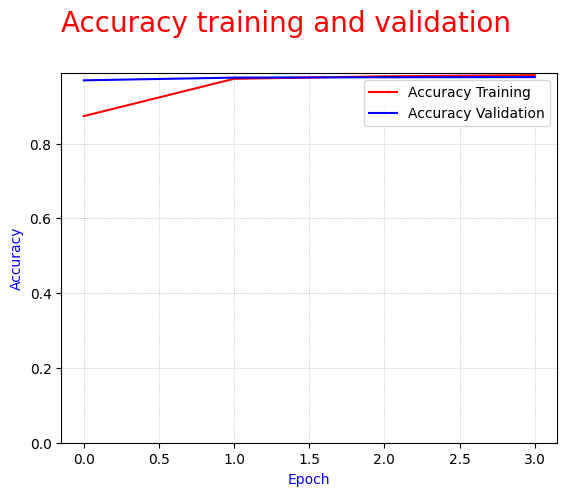

<Figure size 640x480 with 0 Axes>

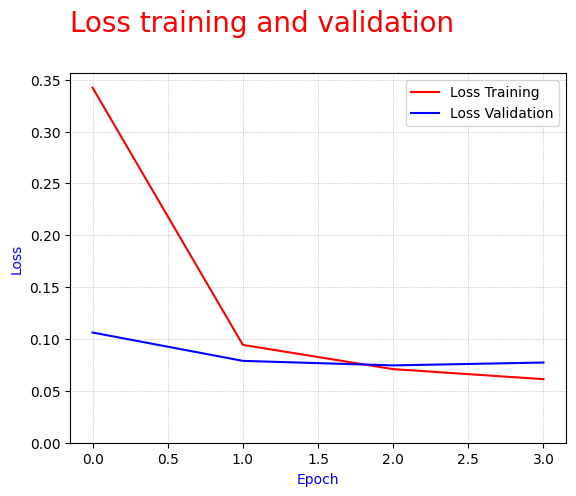

<Figure size 640x480 with 0 Axes>

In [137]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'r',label="Accuracy Training")
plt.plot(epochs,val_accuracy,'b',label="Accuracy Validation")
plt.title('Accuracy training and validation',loc='left',pad=30,fontsize=20,color='red')
plt.ylabel('Accuracy',color = 'blue')
plt.xlabel('Epoch',color = 'blue')
plt.legend(loc=0)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Loss Training")
plt.plot(epochs,val_loss,'b',label="Loss Validation")
plt.title('Loss training and validation',loc='left',pad=30,fontsize=20,color='red')
plt.ylabel('Loss',color = 'blue')
plt.xlabel('Epoch',color = 'blue')
plt.legend(loc=0)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.figure()
plt.show()

TFIDF X RANDOM FOREST

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = new_df_app_reviews['text_akhir']
y = new_df_app_reviews['polarity']
 
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())
 
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9644945697577276
Random Forest - accuracy_test: 0.6472904483430799


Word2Vec X Random Forest

In [140]:
%pip install gensim numpy==1.26.0

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk


tokenized_data = [word_tokenize(sentence.lower()) for sentence in text]

model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

Note: you may need to restart the kernel to use updated packages.


In [141]:
import numpy as np
# Function to get word embeddings for each review
def get_review_embedding(review, model):
    # Initialize an empty list to store word vectors
    word_vectors = []
    
    for word in review:
        if word in model.wv:  # Check if word exists in the Word2Vec model
            word_vectors.append(model.wv[word])
    
    # Average the word vectors to get a single embedding for the review
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        # If no words in the review have embeddings, return a zero vector
        return np.zeros(model.vector_size)



In [142]:
review_embeddings = np.array([get_review_embedding(review, model) for review in tokenized_data])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(review_embeddings, labels, test_size=0.2)



In [143]:
# Membuat objek model Random Forest
rf = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
rf.fit(X_train, y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)
 
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9999561403508772
Random Forest - accuracy_test: 0.5964327485380116
